# Dataframe DFC (City Hotel)

## Importamos librerias

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Warnings
import warnings
warnings.filterwarnings("ignore")

# EDA dataframe dfc

In [17]:
dfc = pd.read_csv("DataFrameCityHotel.csv")
dfc.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,arrival_date,L.O.S.,Generates_Rev,room_pax
0,City Hotel,1,88,2015,7,1,0,4,2,0,...,No Deposit,Transient,76.5,0,1,Canceled,01/07/2015,4,0,2
1,City Hotel,1,65,2015,7,1,0,4,1,0,...,No Deposit,Transient,68.0,0,1,Canceled,01/07/2015,4,0,1
2,City Hotel,1,92,2015,7,1,2,4,2,0,...,No Deposit,Transient,76.5,0,2,Canceled,01/07/2015,6,0,2
3,City Hotel,1,100,2015,7,2,0,2,2,0,...,No Deposit,Transient,76.5,0,1,Canceled,02/07/2015,2,0,2
4,City Hotel,1,79,2015,7,2,0,3,2,0,...,No Deposit,Transient,76.5,0,1,Canceled,02/07/2015,3,0,2


In [18]:
# Eliminamos la columna "hotel" 
dfc.drop("hotel", axis = 1, inplace = True)

In [19]:
dfc.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status', 'arrival_date',
       'L.O.S.', 'Generates_Rev', 'room_pax'],
      dtype='object')

#### dfc.describe()

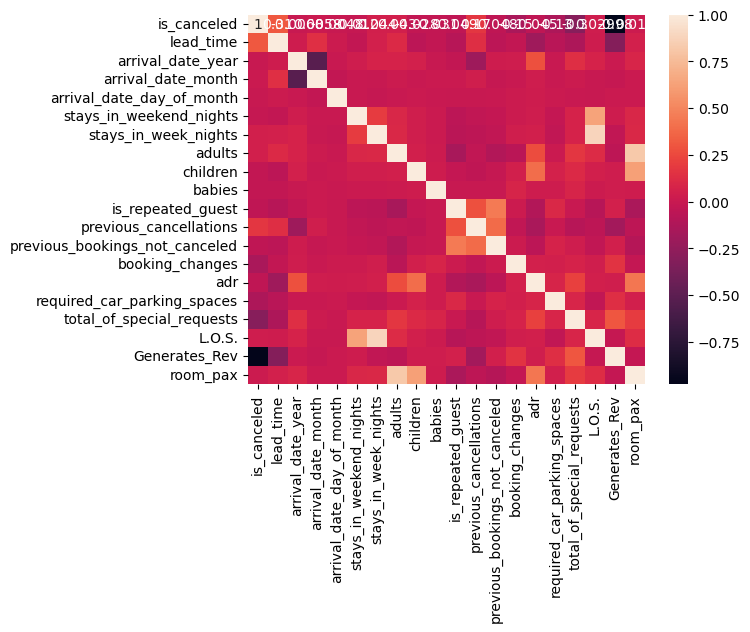

In [22]:
sns.heatmap(dfc.corr(), annot=True, fmt=".2g")
plt.show()

Podemos ver en este heatmap que las reservas canceladas no han reportado ningún beneficion, y que existe correlación entre la asiduidad de los clientes y la cancelación de las reservas

In [23]:
dfc["adults"].unique()

array([2, 1, 3, 4], dtype=int64)

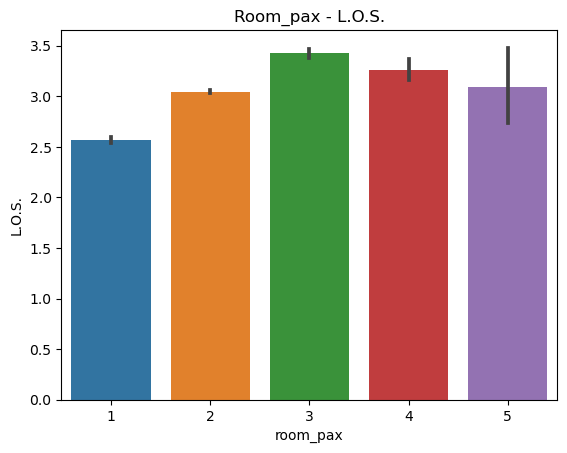

In [24]:
# Podemos ver  que los que tienen una mayor LOS son las habitaciones que tienen 3 personas, y las que menos L.O.S. las habitaciones con 1 persona.
sns.barplot(x='room_pax',
            y='L.O.S.',
            data=dfc)  
plt.title('Room_pax - L.O.S.')  
plt.show()

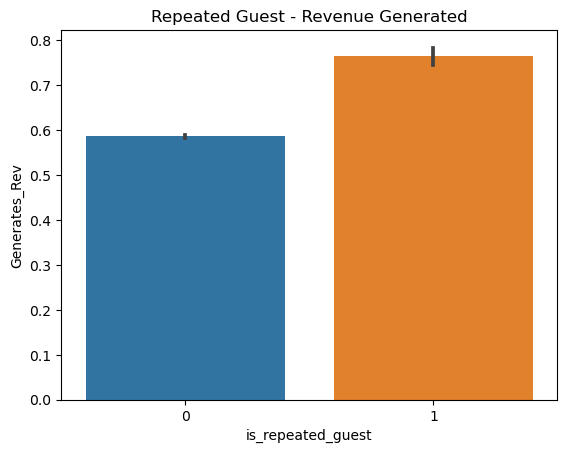

In [25]:
sns.barplot(x='is_repeated_guest',
            y='Generates_Rev',
            data=dfc)  
plt.title('Repeated Guest - Revenue Generated')  
plt.show()

In [26]:
# En este grafico de barras vemos que los repeating guests generan en torno a un 20% más que los non repeating guests

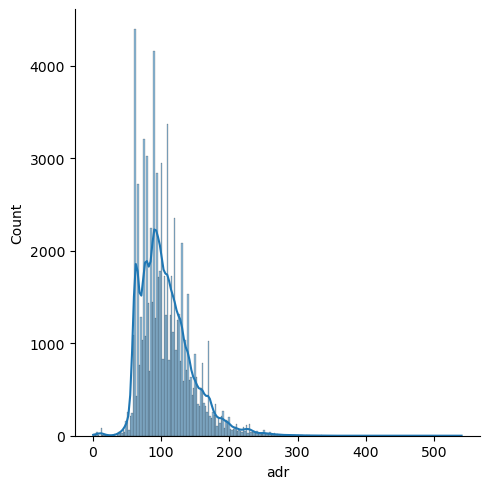

In [27]:
sns.displot(dfc['adr'],kde = True )
plt.show()

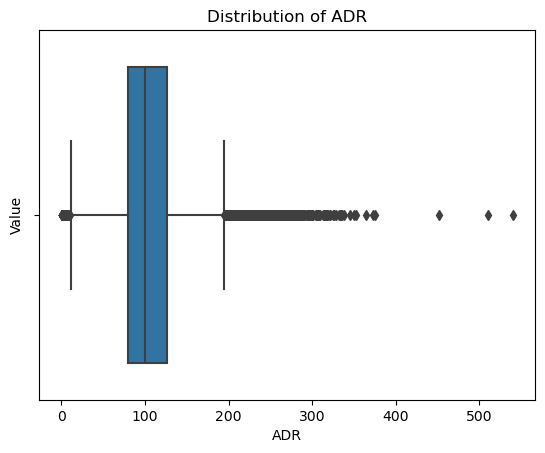

In [28]:
sns.boxplot(x='adr', data=dfc)
plt.xlabel('ADR')
plt.ylabel('Value')
plt.title('Distribution of ADR')
plt.show()

In [29]:
# Based on this boxplot, we are going to categorize the values into ranges so that we can have categories grouping certain price ranges.
category_thresholds = [0,60, 140, 220, 350]
dfc['adr_cat'] = pd.cut(dfc['adr'],
                         bins=category_thresholds + [5001],
                         labels=['Tipo1', 'Tipo2', 'Tipo3', 'Tipo4', 'Tipo5'])

### 

### Now we have a column with ADRs categorized by types, where Type 2 represents the most common ADR, specifically between 60 and 140 (81%).

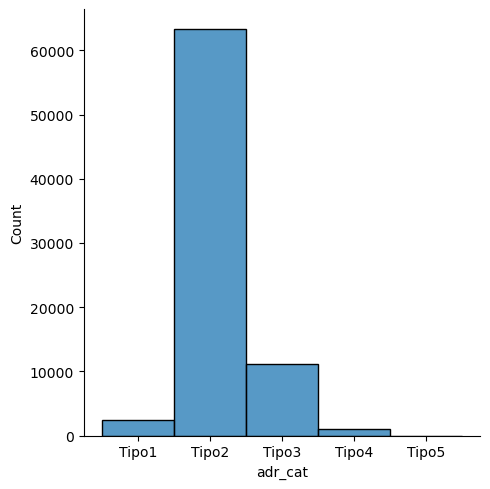

In [30]:
sns.displot(dfc['adr_cat'])
plt.show()

In [31]:
dfc.to_csv("DataFrameCityHotel_preprocesado.csv", index = False)